# Reporte de Copa KC Setiembre 2022

>Reporte de Mazos de la comunidad LATAM usados en la primera fase de la KC Cup en YuGiOh! Duel Links

![](https://s3.duellinksmeta.com/img/legacy-articles/content/tournaments/kc-cup/09/thumbnail-temp.jpg)


## Un poco de contexto
---
[Yu-Gi-Oh! Duel Links](https://www.konami.com/yugioh/duel_links/en/) es un videojuego de cartas coleccionables digital con mecánica free-to-play con microtransacciones desarrollado por Konami para Windows descargable con Steam, iOS y Android. Primero se lanza en Japón el 17 de noviembre de 2016 y se libera a nivel mundial el 11 de enero de 2017.
En el lore del juego, Seto Kaiba a través de su corporación crea una realidad virtual llamada "Duel World" para reunir a los mejores duelistas para que puedan competir donde a lo largo del tiempo acompañan los personajes de las diferentes sagas y spin-offs.

Por medio de ello realiza cada cierto tiempo la copa Kaiba Corporation para demostrar quien es el mejor duelista del planeta.


![](http://pa1.narvii.com/6911/6ae48b510a713f089f643bd060e681f37891bc52r1-540-540_00.gif)


Es un sistema de ranking que consta de 2 fases, en resumen la fase 1 recompensa gemas que son la moneda del juego y en la fase 2 da premio al 1er lugar para clasificar al mundial de yugioh pero no recompensa gemas. Por lo que la comunidad normalmente prioriza la fase 1 que te da recursos para la cuenta.


## Conociendo los datos

**1.  id**
registro único para identificar usuario.

**2.  usuario**
Es el jugador, en la base de datos es único y no deja reportar si jugó en varias cuentas, es criterio de exclusión de la base de datos si se reporta que jugó varias cuentas/decks.

**3.  deck**
Arquetipo usado.

**4.  skill**
Habilidad usada en el deck.

**5.  wins**
Total de victorias conseguidas en el mes reportado hasta el momento que llegó al ndmax, por eventos separados el juego no contabiliza.

**6.  ndmax**
Fecha que llegó al rango máximo.

**7.  Los booleanos**
Comprueba si el usuario compartió su deck en qué server en concreto.   
    - zerotg  = [ZeroTG](https://www.youtube.com/c/ZeroTG)   
    - zephra  = [ZephraCarl](https://www.youtube.com/c/ZephraCarl)   
    - bryan  = [Bryan Norén](https://www.youtube.com/c/BryanNorén)   
    - xenoblur  = [Xenoblur](https://www.youtube.com/c/XenoBlur)

## Pre-procesamiento de datos
---

Un poco de spam de código, **cargando datos...**

![](https://media.giphy.com/media/EXnmWXYei4pcMxkh8o/giphy.gif)

In [1]:
# Poniendo las librerías
from os.path import abspath
from pathlib import Path
import decouple
from datetime import datetime
import logging
import os
import pyprojroot
import requests as req
from sqlalchemy import create_engine as ce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info

In [2]:
logging.basicConfig(
    format = '%(message)s', 
    level=logging.DEBUG,  
    encoding="utf-8"
    )

In [3]:
now = datetime.now()
today = now.strftime('%d-%m-%Y')

In [4]:
config = decouple.AutoConfig(' ')

In [5]:
pg_engine = ce(config('engine_psql'))
logging.info("Conexión exitosa.")

Conexión exitosa.


In [6]:
connection = pg_engine.raw_connection()
cursor = connection.cursor()
cursor.execute("SELECT version()")
row = cursor.fetchone()
logging.info("Versión del servidor de PostgreSQL: {}".format(row))

Versión del servidor de PostgreSQL: ('PostgreSQL 13.8, compiled by Visual C++ build 1914, 64-bit',)


In [7]:
with open(str(abspath('table_create.sql')), 'r', encoding='utf-8') as myfile:
            tc = myfile.read()
            cursor.execute(tc)
            logging.info("Tabla creada")

Tabla creada


In [8]:
files = Path(str(pyprojroot.here('report-days-sql'))).glob("*.sql")
for line in files:
        with open(line, 'r', encoding='utf-8') as insert_into:
            report_day = insert_into.read()
            cursor.execute(report_day)
            connection.commit()
logging.info(f'Registros insertados hasta el {str(today)}')

Registros insertados hasta el 19-09-2022


**Base de datos cargada**

![](https://media.giphy.com/media/zBlVtzQrpCU4OtSJb4/giphy.gif)

### Conteo de observaciones y variables

In [9]:
df = pd.read_sql("kcsep22", pg_engine)
logging.info(f'En total hay {df.shape[0]} usuarios registrados')

En total hay 362 usuarios registrados


```python
# Mostrando tabla
df
```

In [10]:
df

,id,usuario,deck,skill,wins,ndmax,zerotg,zephra,bryan,xenoblur
0,1,0953,Tech Genus,Control de Vuelo,62.0,2022-09-06,True,False,False,False
1,2,0986,Rose Dragon,Conjuro de Rosas,102.0,2022-09-06,True,False,False,False
2,4,6100,Rose Dragon,Conjuro de Rosas,45.0,2022-09-06,True,False,False,False
3,5,4074,Elemental Heros,Duelo Favorito,163.0,2022-09-06,True,False,False,False
4,8,4162,Meklord,Refinamiento Meklord,92.0,2022-09-07,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
357,368,9193,Galaxy-Eyes,Galaxia XYZ,87.0,2022-09-18,False,False,False,True
358,369,9338,Deskbots,Pasa a la acción Invocación por Péndulo,NaN,2022-09-18,False,False,False,True
359,345,1737,Railway,Tren Imparable,NaN,2022-09-18,True,True,False,False
360,356,0731,Elemental Heros,Duelo Favorito,61.0,2022-09-18,False,True,False,False


## Visualización de los datos

### Registro de la comunidad

In [11]:
servers = ['zerotg', 'zephra', 'bryan', 'xenoblur']

In [12]:
logging.info('Tabla de cuántos usuarios reportaron sus ndmax a los servers')
cantidad = [int(df.zerotg.sum()), int(df.zephra.sum()), int(df.bryan.sum()), int(df.xenoblur.sum())]
for i in servers:
    df[i] = df[i].apply(lambda x: int(x))

comunidad = (
    pd.DataFrame(list(zip(servers, cantidad)), 
                 columns = ['Servers', 'Total'])
    .sort_values('Total', ascending=0)
)
comunidad

Tabla de cuántos usuarios reportaron sus ndmax a los servers


,Servers,Total
0,zerotg,187
1,zephra,112
2,bryan,111
3,xenoblur,61


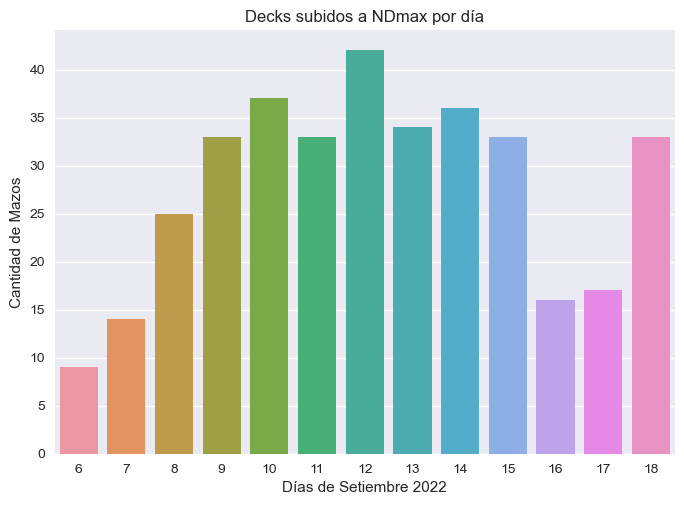

En promedio suelen tardar hasta el día 12 para llegar a ndMAX


In [15]:
df['day'] = pd.DatetimeIndex(df['ndmax']).day
sns.countplot(data=df, x='day')
plt.style.use('seaborn')
plt.title('Decks subidos a NDmax por día')
plt.ylabel('Cantidad de Mazos')
plt.xlabel('Días de Setiembre 2022')
plt.show()
logging.info(f'En promedio suelen tardar hasta el día {round(df.day.mean())} para llegar a ndMAX')

In [16]:
top_decks_color = {
    'Meklord': '#00ff55ff',
    'Phantom Knights': '#000000ff',
    'Rose Dragon': '#FF0064ff',
    'Galaxy-Eyes': '#ff8B00ff',
    'Elemental Heros': '#700cc2ff'
}

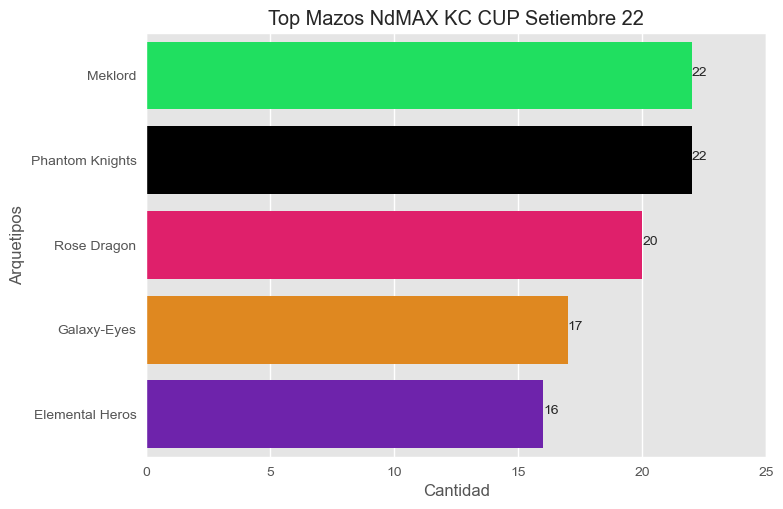

De 72 arquetipos distintos este el top 5


In [18]:
decks = (
    df.groupby(['deck'])['deck'].count()
    .reset_index(name='total')
    .sort_values('total', ascending=0)
)
top_decks = decks[0:5]
plt.style.use('ggplot')
fig, ax = plt.subplots()
sns.barplot(data=top_decks, y='deck', x='total', palette=top_decks_color)
plt.title('Top Mazos NdMAX KC CUP Setiembre 22')
for pY, pX in enumerate(top_decks.total):
    ax.annotate(pX, xy=(pX, pY))
plt.xlim(0,25)
plt.ylabel('Arquetipos')
plt.xlabel('Cantidad')
plt.show()
logging.info(f'De {df["deck"].nunique()} arquetipos distintos este el top 5')

### Habilidades que usaron los Top Decks

In [19]:
skill_df = (
    df.groupby(['deck','skill'])['skill'].size()
    .reset_index(name='total')
    .sort_values('deck', ascending=1)
)

In [20]:
skill_df.query("deck=='Meklord'")

,deck,skill,total
68,Meklord,Refinamiento Meklord,22


In [21]:
skill_df.query("deck=='Phantom Knights'")

,deck,skill,total
78,Phantom Knights,Estrategia Fantasma,15
79,Phantom Knights,La Orden de los Caballeros Fantasma,7


In [22]:
skill_df.query("deck=='Rose Dragon'")

,deck,skill,total
87,Rose Dragon,Conjuro de Rosas,20


In [23]:
skill_df.query("deck=='Galaxy-Eyes'")

,deck,skill,total
40,Galaxy-Eyes,Galaxia XYZ,16
39,Galaxy-Eyes,Fotónico de la Galaxia,1


In [24]:
skill_df.query("deck=='Elemental Heros'")

,deck,skill,total
26,Elemental Heros,Duelo Favorito,16


>Se aprecia que los arquetipos juegan su versión óptima una sola habilidad.
>Pocos se ven que pueden jugar varias skills

### Arquetipos con mayor diversidad de habilidades

In [25]:
deck_variety_skill = (
    df.groupby(['deck'])['skill'].nunique()
    .reset_index(name='total')
    .sort_values('total', ascending=0)
)
deck_variety_skill.query("total>2")

,deck,total
34,Heros,5
41,Magnet Warrios,5
0,Abyss Actor,3
52,Qliphort,3
32,Harpies,3
15,Dark Magician,3
24,Fluffal,3
48,Necroz,3
58,Shiranui,3
65,Tech Genus,3


In [26]:
logging.info('su lista de Habilidades del top 2')
skill_df.query("deck=='Heros' or deck=='Magnet Warrios'")

su lista de Habilidades del top 2


,deck,skill,total
48,Heros,Alianza de Héroes,3
49,Heros,Fusión Milagrosa,1
50,Heros,Héroe Herido,1
51,Heros,Maestro de Fusión,1
52,Heros,Robar sentido Viento,3
60,Magnet Warrios,Aumento de LP alfa,1
61,Magnet Warrios,Duplicar Nivel,1
62,Magnet Warrios,Guerreros Fósiles,2
63,Magnet Warrios,Lectura Mental,1
64,Magnet Warrios,Robo del Destino,2


### Habilidades que se repiten en distintos arquetipos

In [27]:
logging.info('Esta tabla representa la skill que se encuentra en distintos arquetipos')
skill_distint_deck = (
    df.groupby(['skill'])['deck'].nunique()
    .reset_index(name='total')
    .sort_values('total', ascending=0)
)
skill_distint_deck.query("total>2")

Esta tabla representa la skill que se encuentra en distintos arquetipos


,skill,total
70,Robo del Destino,10
57,Precognición,3
4,Aumento de LP alfa,3
5,Barrera de Luz,3
35,La Impactante actuación de Sylvio,3
68,Robar sentido Viento,3


In [28]:
logging.info('Tabla de todos los mazos que usan Robo del Destino')
skill_df.query("skill=='Robo del Destino'")

Tabla de todos los mazos que usan Robo del Destino


,deck,skill,total
20,Dark Magician,Robo del Destino,7
25,Dragunity,Robo del Destino,1
43,Gravekeepers,Robo del Destino,3
45,Harpies,Robo del Destino,1
58,Lunalight,Robo del Destino,6
64,Magnet Warrios,Robo del Destino,2
89,Satellarknights,Robo del Destino,13
92,Shiranui,Robo del Destino,4
96,Super Quant,Robo del Destino,1
111,Yosenjus,Robo del Destino,2


>Hace referencia al anime cuando en sus partidas difíciles Yugi roba la carta que necesita para ganar el duelo.   
![](https://i.imgur.com/UM1Fvc1.png)

![](https://c.tenor.com/DRn16ES_h-EAAAAC/yu-gi-oh-yami-yugi.gif)

In [29]:
pg_engine.dispose()
logging.info("Reporte finalizado, terminar conexión.")

Reporte finalizado, terminar conexión.


![](http://pa1.narvii.com/6411/55721509d05e50566c9077a912c78d9ab935111d_00.gif)

## Información de sesión
---

In [30]:
session_info.show()

![](https://pa1.narvii.com/6924/10a6261502508433f8e2500b86c6a9e820f83de0r1-443-247_hq.gif)